<a href="https://colab.research.google.com/github/Tanvi-Gajula/Projects/blob/main/AIRev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Amazon sales dataset
dataset = pd.read_csv('/content/archive (14).zip')
dataset
df =  pd.read_csv('/content/archive (14).zip')

EDA

1. Data Overview

In [ ]:
dataset.shape

(1465, 16)

In [ ]:
dataset.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

2. Data Preprocessing

In [ ]:
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
data_drop = dataset.dropna()

In [ ]:
data_drop.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
dataset.loc[dataset["rating"].isin(["|"])] = "0"


columns_need_change = [ "discounted_price"  ,  "actual_price"   ,  "discount_percentage"   ,  "rating"  ,   "rating_count" ]

for i in columns_need_change:
    dataset[i] = dataset[i].str.replace("₹","")
    dataset[i] = dataset[i].str.replace("%","")
    dataset[i] = dataset[i].str.replace(",","")

    dataset[i] = dataset[i].astype("float")

    print("Finshed > {}".format(i))

Finshed > discounted_price
Finshed > actual_price
Finshed > discount_percentage
Finshed > rating
Finshed > rating_count


In [ ]:
dataset.drop_duplicates(subset=["product_id"],inplace=True)

In [ ]:
# label encoding
label_encoder = preprocessing.LabelEncoder()
dataset['product_id']= label_encoder.fit_transform(dataset['product_id'])
dataset['product_name']= label_encoder.fit_transform(dataset['product_name'])
dataset['user_id']= label_encoder.fit_transform(dataset['user_id'])
dataset['user_name']= label_encoder.fit_transform(dataset['user_name'])
dataset['discounted_price']= label_encoder.fit_transform(dataset['discounted_price'])
dataset['actual_price']= label_encoder.fit_transform(dataset['actual_price'])
dataset['category']= label_encoder.fit_transform(dataset['category'])
dataset['discount_percentage']= label_encoder.fit_transform(dataset['discount_percentage'])
dataset['about_product']= label_encoder.fit_transform(dataset['about_product'])
dataset['review_id']= label_encoder.fit_transform(dataset['review_id'])
dataset['review_title']= label_encoder.fit_transform(dataset['review_title'])
dataset['review_content']= label_encoder.fit_transform(dataset['review_content'])
dataset['img_link']= label_encoder.fit_transform(dataset['img_link'])
dataset['product_link']= label_encoder.fit_transform(dataset['product_link'])

print(dataset['user_id'].unique())
print(dataset['product_name'].unique())
print(dataset['product_id'].unique())
print(dataset['actual_price'].unique())

[619  89 843 ... 859 298 430]
[1158  135 1023 ...  165  462  196]
[347 848 819 ...  28  62 135]
[106  34 164  67  39 100  49  28  99  33  80  68  89 401 391 159 393  17
 384 385 174  73  57  64 165 427  66 416 142 116  46  38 180  50 178 359
 130 392 135 428  83 131 366 217 424 409 255  25 381 123 422 423 435  81
 411 161 408 441 386 396 370 425 426 152  56 404 115 415 136 430  92 189
 125 388 369 143  84 114 394 195 429  47 378 348 444  53 418 151 410 339
 374 440  58 134 183 284 154 107 431 437  78  79  98 449 448  74 275 400
  63 223 379 442  65 447 417 436 433 270 405  44  90 103 402 240 367 434
 443 432 382 341 325 334 406 312 355 160 326 376 390 347 329  48 375 300
 389 253 414 420 403  62  14 212 407 145 362 313 309 215 190  10 289 413
 421 239 201 119 336 445 267  88  23 173  31   2  13 121 194 292 127 122
  75 196  16  21 269  54 237  26 209  41  12 218  86 193 363   3 233  36
  43 175 213   8 158  20 148 179 258 113   7 238  69  55 318 200 192 282
   4 205 295 128 232 214  15

3. Data Visualization

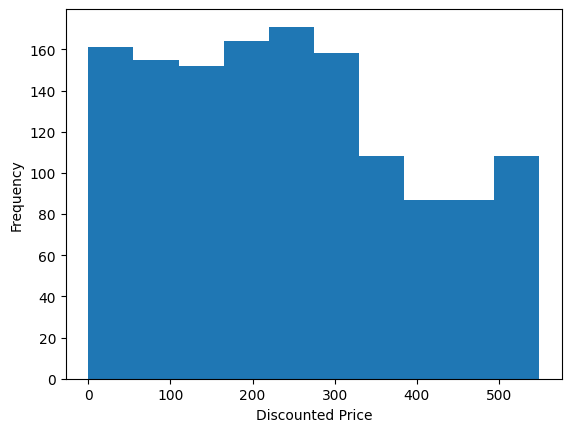

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of discounted_price
plt.hist(dataset['discounted_price'])
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.show()

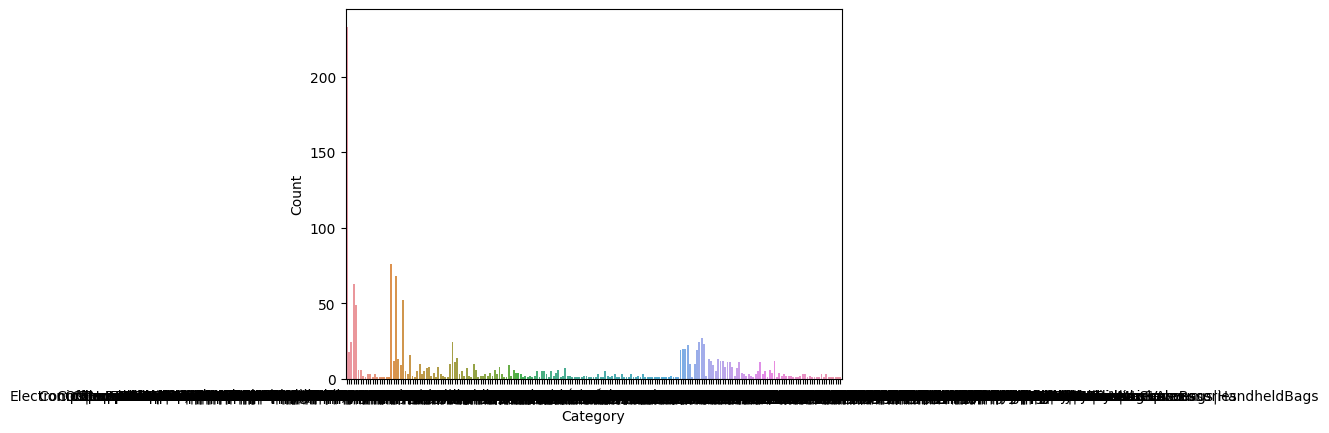

In [ ]:
# Bar plot of category
sns.countplot(x='category', data=dataset)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

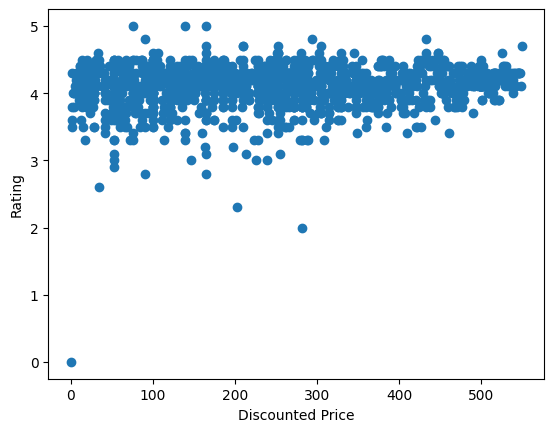

In [ ]:
# Scatter plot of discounted_price vs. rating
plt.scatter(dataset['discounted_price'], dataset['rating'])
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

<Axes: >

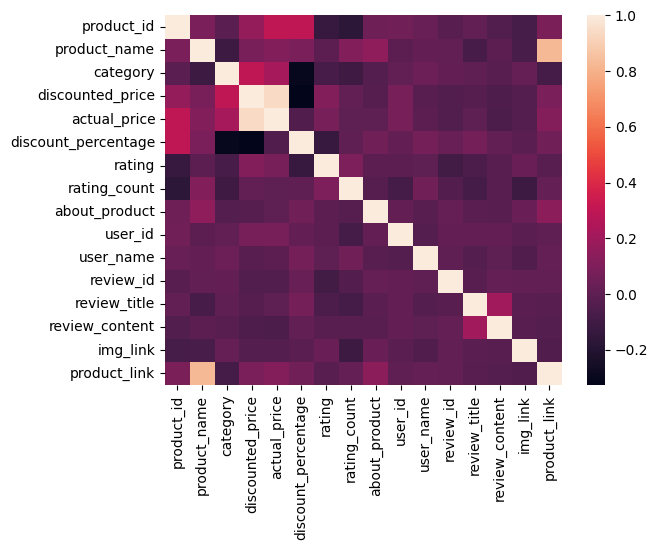

In [ ]:
sns.heatmap(dataset.corr())

In [ ]:
#drop columns
df = dataset.drop(columns=['product_link', 'img_link', 'review_content'])

In [ ]:
df[dataset["discounted_price"] > 50000]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title
249,B09WN3SRC7,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",77990.0,139900.0,44.0,4.7,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,"AF6Z2OYIXRPZJHVYN2MFKKYHPHFQ,AH5SAORYVUN5MGIBL...","David P.,Dr. ATUL THAKUR,Shriniwas Patil,Tahir...","R16HCZ0W1TRSMM,R12J7UKQ0FX3O9,R8729SR7LQFUU,R1...",Product installation was excellent but delive...
255,B0BC8BQ432,VU 164 cm (65 inches) The GloLED Series 4K Sma...,"Electronics|HomeTheater,TV&Video|Televisions|S...",54990.0,85000.0,35.0,4.3,3587.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AHY6AK5LXBTGXDDXSU57ISMDW55Q,AGULFHMPCHCL32WCI...","UtdBuzz,Mukund Nagvenkar,S.R K.,Pruthvi Raj Goud","R2G4T57OLXDVPL,R3IQ8PWVTWENBY,RH6UHEBP622FT,R3...",Good TV for the price. (But my experience was ...
325,B095JPKPH3,OnePlus 163.8 cm (65 inches) U Series 4K LED S...,"Electronics|HomeTheater,TV&Video|Televisions|S...",61999.0,69999.0,11.0,4.1,6753.0,Resolution: 4K Ultra HD (3840x2160) | Refresh ...,"AG3QTVXT2ODRVKOQJJRDV5KA2F2A,AGEYM57JOHPNX77ZY...","Rashmi,Raghvendra,Hari Prasad P,Vishnu singh,T...","R2PF9QV9JEQO9K,R2NEN86P63G4ES,R302B7X6H0GIC0,R...","Almost Perfect!,Review After using 1month,Nice..."


4. Which Category capture the market

In [ ]:
df['category'].value_counts()

Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                                      

In [ ]:
df['category'] = df.category.apply(lambda x:x.split('|')[0].replace('&',' & '))
df['category'].value_counts()

Electronics                526
Computers & Accessories    453
Home & Kitchen             448
OfficeProducts              31
MusicalInstruments           2
HomeImprovement              2
Toys & Games                 1
Car & Motorbike              1
Health & PersonalCare        1
Name: category, dtype: int64

<Axes: xlabel='count', ylabel='category'>

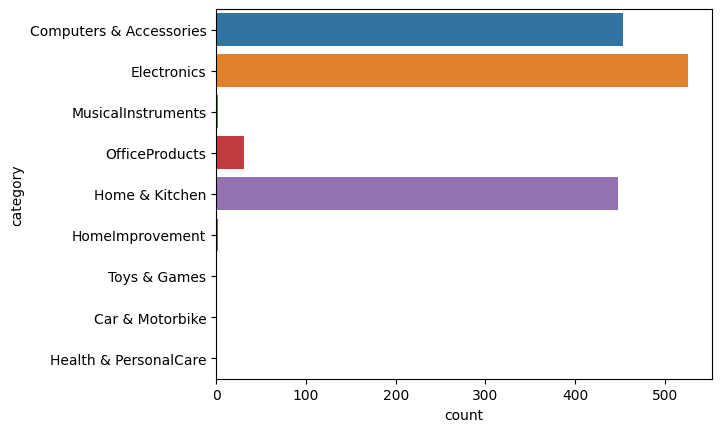

In [ ]:
sns.countplot(data = df, y = 'category')

In [ ]:
#K-means Clustering groups the customers with other similar interest customers and recommends the product
# Preprocess the dataset

# Define the number of clusters (K)
K = 5

# Extract relevant features for clustering
features = ['product_id', 'product_name','user_id', 'user_name']

# Initialize K cluster centroids
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(dataset[features])

# Assign each customer to the nearest centroid
user_data = kmeans.predict(dataset[features])

# Recommend products from each centroid to customers
recommended_products = []
for user_id in user_data:
    products_in_cluster = dataset[dataset['product_id'] == user_id]['product_id']
    recommended_products.extend(products_in_cluster)

# Display recommended products for each customer
for user_id, product_name in zip(dataset['user_id'], recommended_products):
    print(f"Customer {user_id}: Recommended products - {product_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Customer 623: Recommended products - 2
Customer 88: Recommended products - 1
Customer 849: Recommended products - 4
Customer 254: Recommended products - 2
Customer 17: Recommended products - 3
Customer 210: Recommended products - 2
Customer 662: Recommended products - 4
Customer 1162: Recommended products - 4
Customer 859: Recommended products - 2
Customer 88: Recommended products - 0
Customer 891: Recommended products - 0
Customer 254: Recommended products - 4
Customer 279: Recommended products - 2
Customer 851: Recommended products - 0
Customer 304: Recommended products - 0
Customer 830: Recommended products - 4
Customer 1008: Recommended products - 1
Customer 88: Recommended products - 1
Customer 372: Recommended products - 1
Customer 981: Recommended products - 0
Customer 489: Recommended products - 0
Customer 196: Recommended products - 2
Customer 1007: Recommended products - 0
Customer 1048: Recommended products - 0
Customer 537: Recommended products - 3
Customer 866: Recommended

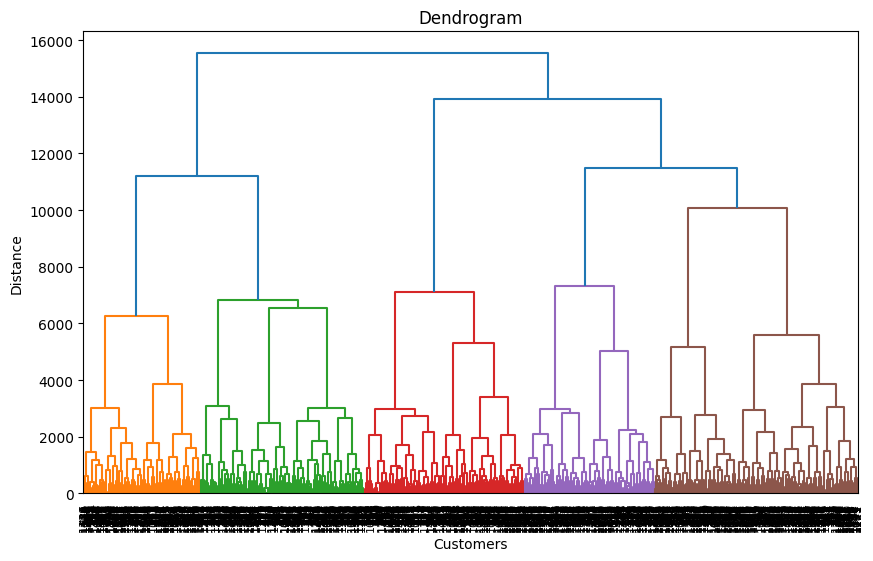

In [ ]:
#Dendogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the features relevant for clustering
features = dataset[['product_id', 'product_name','user_id', 'user_name']]

# Perform hierarchical clustering using Euclidean distance and Ward's linkage
Z = linkage(features, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [ ]:
#Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#discounted_price,actual_price
features = ['product_name','product_id']

# Extract the target variable (price)
target = ['actual_price']  # Replace with the actual target variable name

# Split the dataset into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=0)

# Choose a regression model
regression_model = LinearRegression()

# Train the regression model
regression_model.fit(train_data, train_target)

# Evaluate the model's performance
score = regression_model.score(test_data, test_target)
print(f"R-squared score: {score}")

# Use the trained model to predict the price of a product
new_product = pd.DataFrame([[134, 346]], columns=features)  # Replace with actual feature values
predicted_price = regression_model.predict(new_product)

# Display the predicted price
print(f"Predicted price: {predicted_price}")


R-squared score: 0.10149613066114649
Predicted price: [[141.21054612]]


In [ ]:
#Ant Colony Optimization
import numpy as np

# Define the parameters for Ant Colony Optimization
num_ants = 10  # Number of ants
num_iterations = 100  # Number of iterations
pheromone_decay = 0.1  # Pheromone decay rate
alpha = 1  # Pheromone importance factor
beta = 2  # Heuristic importance factor

# Define the objective function
def objective_function(prices):
    # Calculate the objective value based on the pricing strategy
    # You can define your own objective function here based on your specific requirements
    # For example, you can consider maximizing revenue or profit, or minimizing costs.
    # You can access the product information and prices using the dataset provided.

    # Calculate the total discounted price for each product
    total_discounted_price = np.sum(prices * dataset['discounted_price'])

    # Calculate the total actual price for each product
    total_actual_price = np.sum(prices * dataset['actual_price'])

    # Calculate the total discount percentage for each product
    total_discount_percentage = np.sum(prices * dataset['discount_percentage'])

    # Calculate the overall objective value based on your specific requirements
    # Example objective function: maximize revenue
    revenue = total_discounted_price
    objective_value = revenue  # Replace with your specific objective function

    return objective_value

# Initialize the pheromone matrix
pheromone = np.ones(len(dataset))

# Perform Ant Colony Optimization
best_solution = None
best_objective_value = float('-inf')

for iteration in range(num_iterations):
    solutions = []
    objective_values = []

    # Construct solutions using the ACO algorithm
    for ant in range(num_ants):
        prices = np.random.randint(0, 2, len(dataset))  # Randomly initialize prices

        # Calculate the objective value for the current solution
        objective_value = objective_function(prices)

        solutions.append(prices)
        objective_values.append(objective_value)

    # Update the best solution
    best_index = np.argmax(objective_values)
    if objective_values[best_index] > best_objective_value:
        best_objective_value = objective_values[best_index]
        best_solution = solutions[best_index]

    # Update the pheromone matrix
    pheromone *= (1 - pheromone_decay)
    for ant in range(num_ants):
        pheromone += solutions[ant] * (1 / objective_values[ant])

    # Perform local pheromone update
    local_update = np.zeros(len(dataset))
    for i in range(len(dataset)):
        if best_solution[i] == 1:
            local_update[i] = 1 / best_objective_value
    pheromone += local_update

# Print the best solution and objective value
print("Best Solution:", best_solution)
print("Best Objective Value:", best_objective_value)


Best Solution: [1 0 0 ... 1 1 1]
Best Objective Value: 181335


In [ ]:
#Grey Wolf Optimization
import numpy as np

# Define the parameters for Grey Wolf Optimization
num_wolves = 10  # Number of wolves in the population
max_iterations = 100  # Maximum number of iterations

# Define the fitness function
def fitness_function(solution):
    # Calculate the fitness value based on your problem-specific criteria
    # You can define your own fitness function here based on your specific requirements
    # For example, you can consider the attractiveness of product clusters and price points

    # Access the product information and prices using the dataset provided

    # Calculate the fitness value based on your criteria
    # Example: Calculate the total revenue for the given solution
    total_revenue = np.sum(solution * dataset['discounted_price'])

    fitness_value = total_revenue  # Define your fitness function here

    return fitness_value

# Initialize the population of wolves
population = np.random.uniform(low=0, high=1, size=(num_wolves, len(dataset)))

# Perform Grey Wolf Optimization
best_solution = None
best_fitness = float('-inf')

for iteration in range(max_iterations):
    # Evaluate the fitness of each wolf in the population
    fitness_values = np.zeros(num_wolves)
    for i in range(num_wolves):
        fitness_values[i] = fitness_function(population[i])

        # Update the best solution
        if fitness_values[i] > best_fitness:
            best_fitness = fitness_values[i]
            best_solution = population[i].copy()

    # Update the position of the wolves
    a = 2 - iteration * ((2) / max_iterations)  # Alpha parameter
    for i in range(num_wolves):
        for j in range(len(dataset)):
            r1 = np.random.random()  # Random number between 0 and 1
            r2 = np.random.random()  # Random number between 0 and 1

            A1 = 2 * a * r1 - a  # Equation parameter
            C1 = 2 * r2  # Equation parameter

            D_alpha = np.abs(C1 * best_solution[j] - population[i][j])  # Equation parameter
            X1 = best_solution[j] - A1 * D_alpha  # Equation parameter

            r1 = np.random.random()  # Random number between 0 and 1
            r2 = np.random.random()  # Random number between 0 and 1

            A2 = 2 * a * r1 - a  # Equation parameter
            C2 = 2 * r2  # Equation parameter

            D_beta = np.abs(C2 * best_solution[j] - population[i][j])  # Equation parameter
            X2 = best_solution[j] - A2 * D_beta  # Equation parameter

            r1 = np.random.random()  # Random number between 0 and 1
            r2 = np.random.random()  # Random number between 0 and 1

            A3 = 2 * a * r1 - a  # Equation parameter
            C3 = 2 * r2  # Equation parameter

            D_delta = np.abs(C3 * best_solution[j] - population[i][j])  # Equation parameter
            X3 = best_solution[j] - A3 * D_delta  # Equation parameter

            population[i][j] = (X1 + X2 + X3) / 3  # Update the position of the wolf

# Print the best solution and fitness value
print("Best Solution:", best_solution)
print("Best Fitness Value:", best_fitness)


Best Solution: [-0.0141102  -0.00914315  0.01682158 ...  0.13512638  0.03419286
 -0.06775703]
Best Fitness Value: 1642456093560959.5
